# Rendimiento

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/SISAGRI.csv")

### Exportamos solo lo nesesario y que sea tratable para otros

In [ ]:
df_papa = df[df['PRODUCTO'].str.contains("papa ", case=False, na=False)]
df_papa = df_papa.drop(columns=['COD_UBIGEO', 'COD_PRODUCTO'])

In [ ]:
df_papa.to_csv('/content/sample_data/filtrado_papa.csv', index=False, sep=',', encoding='utf-8')
df = df_papa

## Exploración básica de los datos

In [ ]:
# 1. Ver las primeras 5 filas
print("------------------------Primeras 5 filas:------------------------")
print(df.head())

# 3. Resumen general del DataFrame
print("\n------------------------Información general del DataFrame:------------------------")
df.info()

# 7. Contar valores nulos por columna
print("\n------------------------Conteo de valores nulos y ceros:------------------------")
print((df.isnull() | (df == 0)).sum())
# 10. Contar frecuencia de valores en una columna (reemplazar 'COLUMNA' por el nombre de una columna)
print("\n------------------------Frecuencia de valores en una columna específica:------------------------")
print(df['PRODUCTO'].value_counts() if 'PRODUCTO' in df.columns else "La columna especificada no existe.")

------------------------Primeras 5 filas:------------------------
     AÑO  MES DEPARTAMENTO    PROVINCIA                DISTRITO  \
12  2015   12     AMAZONAS  CHACHAPOYAS             CHUQUIBAMBA   
50  2015    8     AMAZONAS         LUYA  SAN FRANCISCO DEL YESO   
57  2015    2     AMAZONAS         LUYA                   LAMUD   
58  2015    2     AMAZONAS         LUYA                   LAMUD   
72  2015    7    CAJAMARCA    CAJABAMBA               CAJABAMBA   

                             PRODUCTO  SIEMBRA  COSECHA  PRODUCCION  \
12       PAPA CHAUCHA (papas nativas)      0.0      1.0        15.0   
50        PAPA HUAIRO (papas nativas)      0.0      7.0       136.5   
57    PAPA CANCHAN (mejoradas)- color      3.0      0.0         0.0   
58            PAPA YUNGAY (mejoradas)      0.0      0.0         0.0   
72  PAPA (agrupa mejoradas y nativas)     40.0     33.0       165.3   

    PRECIO_CHACRA  
12           1.85  
50           0.87  
57           0.00  
58           0.00  
72  

#### Cantidad de filas que tienen 0 o null ya sea en Siembra o cosesha

In [ ]:
df[(df['SIEMBRA'].isnull() | (df['SIEMBRA'] == 0)) | (df['COSECHA'].isnull() | (df['COSECHA'] == 0))].shape[0]

55671

In [ ]:
df[(df['SIEMBRA'] < 0) | (df['COSECHA'] < 0)].shape[0]


0

In [ ]:
df_rend_sinPapasNoID = df[
    (df['SIEMBRA'].notnull() & (df['SIEMBRA'] != 0)) &
    (df['COSECHA'].notnull() & (df['COSECHA'] != 0)) &
    (~df['PRODUCTO'].isin([
        'PAPA (agrupa mejoradas y nativas)',
        'PAPA NATIVA (agrupa papas nativas)',
        'PAPA COLOR (agrupa papas mejoradas de color)',
        'PAPA MEJORADA (Agrupa papas mejoradas) '
    ]))
]
df_rend_sinPapasNoID

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA
1015,2015,8,HUANUCO,PACHITEA,MOLINO,PAPA AMARILLA (papas nativas),68.0,58.0,875.0,1.00
1491,2016,4,AMAZONAS,LUYA,SANTO TOMAS,PAPA HUAIRO (papas nativas),22.0,30.0,561.0,0.86
2494,2016,8,HUANUCO,PACHITEA,MOLINO,PAPA AMARILLA (papas nativas),74.0,110.0,1683.0,1.60
2636,2016,3,HUANUCO,HUANUCO,QUISQUI (KICHKI),PAPA AMARILLA (papas nativas),15.0,65.0,877.0,0.86
3797,2017,6,HUANUCO,AMBO,SAN FRANCISCO,PAPA AMARILLA (papas nativas),13.0,20.0,241.0,1.02
...,...,...,...,...,...,...,...,...,...,...
1044883,2017,8,AMAZONAS,CHACHAPOYAS,SOLOCO,PAPA CHAUCHA (papas nativas),1.0,1.0,14.6,1.20
1045644,2018,4,AMAZONAS,CHACHAPOYAS,CHILIQUIN,PAPA CHAUCHA (papas nativas),2.0,2.0,30.0,1.00
1046047,2022,4,AMAZONAS,LUYA,SANTA CATALINA,PAPA HUAIRO (papas nativas),1.0,4.0,80.0,1.65
1047069,2016,4,AMAZONAS,CHACHAPOYAS,ASUNCION,PAPA HUAIRO (papas nativas),2.0,5.0,85.0,0.70


In [ ]:
# Contar cuántos productos únicos hay
num_productos_unicos = df_rend_sinPapasNoID['PRODUCTO'].nunique()

# Obtener la lista de productos únicos con sus conteos
productos_unicos_conteo = df_rend_sinPapasNoID['PRODUCTO'].value_counts()

# Mostrar resultados
print(f"Cantidad de productos únicos: {num_productos_unicos}")
print("\nProductos y sus conteos:")
print(productos_unicos_conteo)


Cantidad de productos únicos: 12

Productos y sus conteos:
PRODUCTO
PAPA HUAIRO (papas nativas)                          399
PAPA YUNGAY (mejoradas)                              230
PAPA AMARILLA (papas nativas)                        176
PAPA CHAUCHA (papas nativas)                         174
PAPA CANCHAN (mejoradas)- color                       94
PAPA AMARILIS (mejoradas)                             85
PAPA UNICA (mejoradas)-color                          19
PAPA SUELA COLORADA (demás papas nativas)             17
PAPA PERRICHOLI (mejoradas)                           14
PAPA HUAMACHUQUINA O LIMEÑA (Demás papas nativas)      7
PAPA HUAMANTANGA (papas nativas)                       2
PAPA MARIVA (Demás papas mejoradas)                    1
Name: count, dtype: int64


In [ ]:
df_rend_sinPapasNoID_6 = df_rend_sinPapasNoID[
    df_rend_sinPapasNoID['PRODUCTO'].isin([
        'PAPA PERRICHOLI (mejoradas)',
        'PAPA CANCHAN (mejoradas)- color',
        'PAPA AMARILIS (mejoradas)',
        'PAPA UNICA (mejoradas)-color',
        'PAPA YUNGAY (mejoradas)',
        'PAPA HUAIRO (papas nativas)'
    ])
]

# Añadir columna 'RENDIMIENTO' calculada como COSECHA / SIEMBRA
df_rend_sinPapasNoID_6 = df_rend_sinPapasNoID_6.copy()  # Para evitar SettingWithCopyWarning
df_rend_sinPapasNoID_6['RENDIMIENTO'] = df_rend_sinPapasNoID_6['COSECHA'] / df_rend_sinPapasNoID_6['SIEMBRA']


In [ ]:
df_rend_sinPapasNoID_6

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA,RENDIMIENTO
1491,2016,4,AMAZONAS,LUYA,SANTO TOMAS,PAPA HUAIRO (papas nativas),22.0,30.0,561.0,0.86,1.363636
3847,2017,5,HUANCAVELICA,TAYACAJA,HUARIBAMBA,PAPA YUNGAY (mejoradas),6.0,25.0,300.0,0.40,4.166667
8988,2021,4,AMAZONAS,CHACHAPOYAS,MOLINOPAMPA,PAPA YUNGAY (mejoradas),5.0,2.0,35.0,0.60,0.400000
9471,2021,6,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PAPA HUAIRO (papas nativas),3.0,2.0,35.0,1.20,0.666667
9926,2021,9,LIMA,CAÑETE,SAN LUIS,PAPA UNICA (mejoradas)-color,3.0,4.0,96.0,0.45,1.333333
...,...,...,...,...,...,...,...,...,...,...,...
1042862,2022,3,AMAZONAS,LUYA,TRITA,PAPA YUNGAY (mejoradas),1.0,1.0,22.0,1.30,1.000000
1044184,2017,5,AMAZONAS,CHACHAPOYAS,MAGDALENA,PAPA HUAIRO (papas nativas),2.0,2.0,31.0,0.67,1.000000
1046047,2022,4,AMAZONAS,LUYA,SANTA CATALINA,PAPA HUAIRO (papas nativas),1.0,4.0,80.0,1.65,4.000000
1047069,2016,4,AMAZONAS,CHACHAPOYAS,ASUNCION,PAPA HUAIRO (papas nativas),2.0,5.0,85.0,0.70,2.500000


In [ ]:
# Conteo de las clases en la columna PRODUCTO
conteo_productos = df_rend_sinPapasNoID_6['PRODUCTO'].value_counts()

# Conteo de los valores únicos de RENDIMIENTO, ordenados por los valores de RENDIMIENTO
conteo_rendimiento = df_rend_sinPapasNoID_6['RENDIMIENTO'].value_counts().sort_index()

# Imprimir los resultados
print("Conteo de las clases en la columna PRODUCTO:")
print(conteo_productos)

print("\nConteo de los valores únicos en la columna RENDIMIENTO (ordenados por los valores de RENDIMIENTO):")
print(conteo_rendimiento)


Conteo de las clases en la columna PRODUCTO:
PRODUCTO
PAPA HUAIRO (papas nativas)        399
PAPA YUNGAY (mejoradas)            230
PAPA CANCHAN (mejoradas)- color     94
PAPA AMARILIS (mejoradas)           85
PAPA UNICA (mejoradas)-color        19
PAPA PERRICHOLI (mejoradas)         14
Name: count, dtype: int64

Conteo de los valores únicos en la columna RENDIMIENTO (ordenados por los valores de RENDIMIENTO):
RENDIMIENTO
0.026316     1
0.041667     1
0.043478     1
0.058824     1
0.062500     1
            ..
13.333333    1
13.500000    1
14.000000    1
24.000000    1
33.000000    1
Name: count, Length: 167, dtype: int64


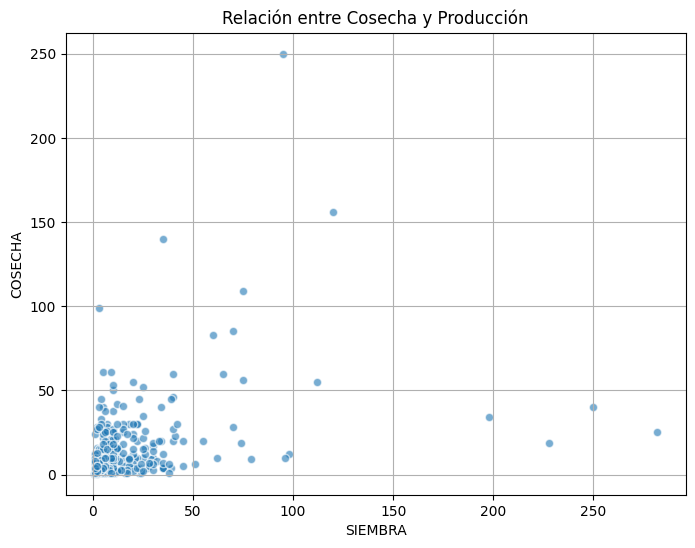

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión entre Cosecha y Producción
plt.figure(figsize=(8, 6))
plt.scatter(df_rend_sinPapasNoID_6['SIEMBRA'], df_rend_sinPapasNoID_6['COSECHA'], alpha=0.6, edgecolors='w')
plt.title('Relación entre Cosecha y Producción')
plt.xlabel('SIEMBRA')
plt.ylabel('COSECHA')
plt.grid(True)
plt.show()


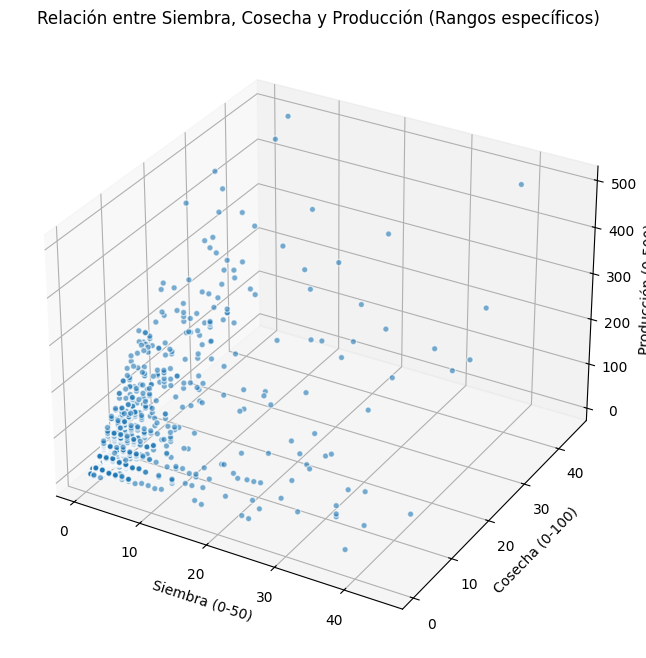

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Filtrar los datos según los rangos especificados
df_filtrado = df_rend_sinPapasNoID_6[
    (df_rend_sinPapasNoID_6['SIEMBRA'] >= 0) & (df_rend_sinPapasNoID_6['SIEMBRA'] <= 50) &
    (df_rend_sinPapasNoID_6['COSECHA'] >= 0) & (df_rend_sinPapasNoID_6['COSECHA'] <= 100) &
    (df_rend_sinPapasNoID_6['PRODUCCION'] >= 0) & (df_rend_sinPapasNoID_6['PRODUCCION'] <= 500)
]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar puntos en 3D
ax.scatter(
    df_filtrado['SIEMBRA'],
    df_filtrado['COSECHA'],
    df_filtrado['PRODUCCION'],
    alpha=0.6,
    edgecolors='w'
)

# Etiquetas de los ejes
ax.set_title('Relación entre Siembra, Cosecha y Producción (Rangos específicos)')
ax.set_xlabel('Siembra (0-50)')
ax.set_ylabel('Cosecha (0-100)')
ax.set_zlabel('Producción (0-500)')

# Mostrar el gráfico
plt.show()


## CONLUSION
- en filtrado_papa.csv solo hay papas y sin columna de obigeos
	- contiene 61mil filas
	- tiene papas ambiguas
	-Produccion <- cosecha (depende)
	- tiene 55mil nulos o ceros en Siembra o Cosecha
	- no tiene valores negativos
- df_rend_sinPapasNoID:
	- 1218 filas
	- con papas semiambiguas ( sin normales,nativa,color,mejoradas) (como huairo,etc)
	- con cosecha y siembra >0
	-desproporcion masiva de clases
- df_rend_sinPapasNoID_6:
	- 841 filas
	-con las 6 que trabajmos
	-el rendimiento es: cosecha/siembra (nose xq la cosecha a veces sale mas xD)
	-reconsiderar entrar a la amarrilla y chaucha (300filas)
	- desproporcion de clases
	- rendimiento: [0.26-33]

# TEM_BIOLO_AGROBIODIVERSIDAD

In [ ]:
pip install dbfread


In [ ]:
import pandas as pd
from dbfread import DBF

# Ruta al archivo DBF
dbf_file = '/content/sample_data/TEM_BIOLO_AGROBIODIVERSIDAD.dbf'

# Leer el archivo DBF y convertirlo en un DataFrame de pandas
table = DBF(dbf_file, encoding='latin1')  # Cambia la codificación si es necesario
df = pd.DataFrame(iter(table))
df

,ID,COLNUMBER,CULTVRNAME,LAT,LONG,SPP,Fuente,BD,bd_descrip,SPP2
0,1,CAarrUNC003,,-4.56400,-79.75800,Arracacha,E,RTA,INIA - PROYECTO DE LA BIODIVERSIDAD DE LAS RAI...,Arracacha
1,2,CAarrUNC007,,-4.56400,-79.75800,Arracacha,E,RTA,INIA - PROYECTO DE LA BIODIVERSIDAD DE LAS RAI...,Arracacha
2,3,CAchUNC062,,-4.56400,-79.75800,Achira,E,RTA,INIA - PROYECTO DE LA BIODIVERSIDAD DE LAS RAI...,Achira
3,4,CLLUNC0062,,-4.61200,-79.77100,Yacon,E,RTA,INIA - PROYECTO DE LA BIODIVERSIDAD DE LAS RAI...,Yacon
4,5,CAarrUNC002,,-4.62600,-79.74400,Arracacha,E,RTA,INIA - PROYECTO DE LA BIODIVERSIDAD DE LAS RAI...,Arracacha
...,...,...,...,...,...,...,...,...,...,...
18893,18946,,miskiuchu,-6.57347,-76.09035,Ají,I,PRATEC0105,PROYECTO ANDINO DE TECNOLOGIAS CAMPESINAS,Ají
18894,18947,,pucuno uchu,-6.57347,-76.09035,Ají,I,PRATEC0105,PROYECTO ANDINO DE TECNOLOGIAS CAMPESINAS,Ají
18895,18948,,makusari,-6.57347,-76.09035,Ají,I,PRATEC0105,PROYECTO ANDINO DE TECNOLOGIAS CAMPESINAS,Ají
18896,18949,,takakilla,-6.57347,-76.09035,Ají,I,PRATEC0105,PROYECTO ANDINO DE TECNOLOGIAS CAMPESINAS,Ají


In [ ]:
# Filtrar las filas donde la columna 'SPP' contiene la palabra 'Papa'
# Asegúrate de que la columna 'SPP' existe y es de tipo string
df_filtered = df[df['SPP'].str.contains('Papa', case=False, na=False)]

# Eliminar las columnas 'SPP', 'Fuente', 'BD', 'bd_descrip', 'COLNUMBER'
columns_to_drop = ['SPP', 'Fuente', 'BD', 'bd_descrip', 'COLNUMBER']
df_filtered = df_filtered.drop(columns=columns_to_drop, errors='ignore')  # 'errors="ignore"' evita errores si alguna columna no existe

# Establecer la columna 'ID' como índice del DataFrame
if 'ID' in df_filtered.columns:
    df_filtered = df_filtered.set_index('ID')

# Mostrar las primeras filas del DataFrame filtrado y modificado
print(df_filtered.head())

# Guardar la tabla filtrada y con columnas eliminadas en un nuevo archivo CSV
output_csv = '/content/sample_data/AGROBIODIVERSIDAD_filtered_byColumns.csv'
df_filtered.to_csv(output_csv)

print(f"Tabla filtrada y limpiada guardada en: {output_csv}")

# Sobrescribir df con la tabla filtrada y modificada
df = df_filtered


             CULTVRNAME    LAT   LONG  SPP2
ID                                         
6121              Curua  -6.45 -78.52  Papa
6122  Celendina Pintada  -6.53 -78.58  Papa
6123     Kello Huaccoto -13.47 -72.25  Papa
6124    Ccohui Sohuillu -13.47 -72.25  Papa
6125            Unknown -13.47 -72.25  Papa
Tabla filtrada y limpiada guardada en: /content/sample_data/AGROBIODIVERSIDAD_filtered_byColumns.csv


In [ ]:
# Resumen general del DataFrame
print("\n------------------------ Información general del DataFrame ------------------------")
df.info()

# Contar valores nulos por columna
print("\n------------------------ Conteo de valores nulos y ceros ------------------------")
print((df.isnull() | (df == 0)).sum())

# Frecuencia de clases solo para columnas de tipo object
print("\n------------------------ Frecuencia de valores por columnas de tipo object ------------------------")
# Identificar columnas de tipo object
object_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre cada columna de tipo object
for col in object_columns:
    print(f"\nColumna: {col}")
    freq = df[col].value_counts(dropna=False)  # Incluye valores nulos en el conteo
    print(freq)  # Imprimir las frecuencias
    print('-' * 80)



------------------------ Información general del DataFrame ------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 6121 to 14879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CULTVRNAME  6236 non-null   object 
 1   LAT         6236 non-null   float64
 2   LONG        6236 non-null   float64
 3   SPP2        6236 non-null   object 
dtypes: float64(2), object(2)
memory usage: 243.6+ KB

------------------------ Conteo de valores nulos y ceros ------------------------
CULTVRNAME    0
LAT           0
LONG          0
SPP2          0
dtype: int64

------------------------ Frecuencia de valores por columnas de tipo object ------------------------

Columna: CULTVRNAME
CULTVRNAME
Unknown             224
Milagro              15
Manzana              15
Huayro               13
Chaucha              12
                   ... 
Chiquina              1
Clavel Huaita         1
Runtus Puca -awi      1
C

In [ ]:
# Filtrar las filas donde CULTVRNAME no sea "Unknown"
df_cleaned = df[df['CULTVRNAME'] != 'Unknown']

# Verificar las primeras filas del nuevo DataFrame
print(df_cleaned.head())

# Opcional: Guardar el DataFrame limpio en un archivo CSV
output_csv_cleaned = '/content/sample_data/AGROBIODIVERSIDAD_cleaned.csv'
df_cleaned.to_csv(output_csv_cleaned)
print(f"DataFrame limpio guardado en: {output_csv_cleaned}")
df=df_cleaned
df

             CULTVRNAME    LAT   LONG  SPP2
ID                                         
6121              Curua  -6.45 -78.52  Papa
6122  Celendina Pintada  -6.53 -78.58  Papa
6123     Kello Huaccoto -13.47 -72.25  Papa
6124    Ccohui Sohuillu -13.47 -72.25  Papa
6127       Yurac Charca -13.47 -72.25  Papa
DataFrame limpio guardado en: /content/sample_data/AGROBIODIVERSIDAD_cleaned.csv


In [ ]:
# Resumen general del DataFrame
print("\n------------------------ Información general del DataFrame ------------------------")
df.info()

# Frecuencia de clases solo para columnas de tipo object
print("\n------------------------ Frecuencia de valores por columnas de tipo object ------------------------")
# Identificar columnas de tipo object
object_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre cada columna de tipo object
for col in object_columns:
    print(f"\nColumna: {col}")
    freq = df[col].value_counts(dropna=False)  # Incluye valores nulos en el conteo
    print(freq)  # Imprimir las frecuencias
    print('-' * 80)



------------------------ Información general del DataFrame ------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 6012 entries, 6121 to 14879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CULTVRNAME  6012 non-null   object 
 1   LAT         6012 non-null   float64
 2   LONG        6012 non-null   float64
 3   SPP2        6012 non-null   object 
dtypes: float64(2), object(2)
memory usage: 234.8+ KB

------------------------ Frecuencia de valores por columnas de tipo object ------------------------

Columna: CULTVRNAME
CULTVRNAME
Milagro             15
Manzana             15
Huayro              13
Chaucha             12
Amarilla            10
                    ..
Chiquina             1
Clavel Huaita        1
Runtus Puca -awi     1
Capucho              1
Trozo de coche       1
Name: count, Length: 4928, dtype: int64
--------------------------------------------------------------------------------

Co

# Prospeccion
Responde a la pregunta, que especie se encuentra en tal lugar


In [ ]:
# Ruta al archivo DBF
dbf_file = '/content/sample_data/bd_prospeccion_papa.dbf'

# Leer el archivo DBF y convertirlo en un DataFrame de pandas
table = DBF(dbf_file, encoding='utf-8')  # Cambia la codificación si es necesario
df = pd.DataFrame(iter(table))
df


,N_°,Código_de,Especie,Subsp,Especie_Su,Nombre_com,Tipo_de_es,Cantidad,Departamen,Provincia,...,Longitud__,Latitud__Y,Longitud,Latitud,Altitud,Instituci,Observacio,F19,F20,F21
0,1.0,13640.0,Solanum tuberosum,subsp. andigena,Solanum tuberosum subsp. andigena,Huahuac-chaquin,No,,APURIMAC,ANDAHUAYLAS,...,73° 23' 14'',13° 39' 20'',-73.387222,-13.655556,2902.0,Universidad Nacional de San Antonio Abad del C...,CHL,,,
1,2.0,12966.0,Solanum tuberosum,subsp. andigena,Solanum tuberosum subsp. andigena,Yuracc matacc o Maco Ojo Blanco,No,,JUNIN,TARMA,...,75° 33' 20'',11° 29' 13'',-75.555556,-11.486944,3624.0,Universidad Nacional Mayor de San Marcos (UNMSM),CHL,,,
2,3.0,13639.0,Solanum tuberosum,subsp. andigena,Solanum tuberosum subsp. andigena,Paullu,No,,APURIMAC,COTABAMBAS,...,"72° 12' 40""","13° 59' 58""",-72.211111,-13.999444,3844.0,Universidad Nacional de San Antonio Abad del C...,CHL,,,
3,4.0,13646.0,Solanum tuberosum,subsp. andigena,Solanum tuberosum subsp. andigena,Puco -Chapiña,No,,CUSCO,CALCA,...,71° 54' 00'',13° 10' 01'',-71.900000,-13.166944,4379.0,Universidad Nacional de San Antonio Abad del C...,CHL,,,
4,5.0,13658.0,Solanum tuberosum,subsp. andigena,Solanum tuberosum subsp. andigena,Churuspi,No,,CUSCO,LA CONVENCION,...,72° 58' 35'',13° 07' 12'',-72.976389,-13.120000,3537.0,Universidad Nacional de San Antonio Abad del C...,CHL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,7540.0,7013.0,Solanum stenotomum,subsp. goniocalyx,Solanum stenotomum subsp. goniocalyx,NN,No,,HUANUCO,HUANUCO,...,76° 10' 52'',9° 55' 00'',-76.181111,-9.916667,2524.0,Centro Internacional de la Papa (CIP),PER,,,
7540,7541.0,6897.0,Solanum chaucha Juz. et Buk.,,Solanum chaucha,Lequechaqui,NN,,CUSCO,PAUCARTAMBO,...,71° 40' 12'',13° 21' 00'',-71.670000,-13.350000,3358.0,Universidad Nacional de San Antonio Abad del C...,NO DATA,,,
7541,0.0,0.0,,,,,,,,,...,,,0.000000,0.000000,0.0,,,,,
7542,0.0,0.0,,,,,,,,,...,,,0.000000,0.000000,0.0,,,,,


In [ ]:
# Resumen general del DataFrame
print("\n------------------------ Información general del DataFrame ------------------------")
df.info()

# Contar valores nulos por columna
print("\n------------------------ Conteo de valores nulos y ceros ------------------------")
print((df.isnull() | (df == 0)).sum())

# Frecuencia de clases solo para columnas de tipo object
print("\n------------------------ Frecuencia de valores por columnas de tipo object ------------------------")
# Identificar columnas de tipo object
object_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre cada columna de tipo object
for col in object_columns:
    print(f"\nColumna: {col}")
    freq = df[col].value_counts(dropna=False)  # Incluye valores nulos en el conteo
    print(freq)  # Imprimir las frecuencias
    print('-' * 80)



------------------------ Información general del DataFrame ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N_°         7544 non-null   float64
 1   Código_de   7544 non-null   float64
 2   Especie     7544 non-null   object 
 3   Subsp       7544 non-null   object 
 4   Especie_Su  7544 non-null   object 
 5   Nombre_com  7544 non-null   object 
 6   Tipo_de_es  7544 non-null   object 
 7   Cantidad    7544 non-null   object 
 8   Departamen  7544 non-null   object 
 9   Provincia   7544 non-null   object 
 10  Distrito    7544 non-null   object 
 11  Longitud__  7544 non-null   object 
 12  Latitud__Y  7544 non-null   object 
 13  Longitud    7544 non-null   float64
 14  Latitud     7544 non-null   float64
 15  Altitud     7544 non-null   float64
 16  Instituci   7544 non-null   object 
 17  Observacio  7544 non-nul

In [ ]:
# Filtrar la columna "Observacio" para que solo contenga "PER"
df_filtered = df[df['Observacio'].str.contains('PER', case=False, na=False)]

# Eliminar columnas irrelevantes, incluyendo "Código_de"
columns_to_drop = ['Instituci', 'F19', 'F20', 'F21', 'Longitud__', 'Latitud__Y', 'Cantidad', 'Tipo_de_es', 'N_°', 'Código_de']
df_filtered = df_filtered.drop(columns=columns_to_drop, errors='ignore')

# Eliminar filas donde "Nombre_com" sea "NN"
df_filtered = df_filtered[df_filtered['Nombre_com'] != 'NN']

# Eliminar la columna "Observacio" ya que solo quedan registros de Perú
df_filtered = df_filtered.drop(columns=['Observacio'], errors='ignore')

# Eliminar filas que contengan valores nulos o ceros en cualquiera de sus columnas
df_filtered = df_filtered.replace(0, pd.NA).dropna()

# Guardar el DataFrame filtrado en un archivo CSV
output_csv = '/content/sample_data/filtrado_peru_sin_NN.csv'
df_filtered.to_csv(output_csv, index=False)

print(f"DataFrame filtrado guardado en: {output_csv}")

DataFrame filtrado guardado en: /content/sample_data/filtrado_peru_sin_NN.csv


In [ ]:
df_filtered

,Especie,Subsp,Especie_Su,Nombre_com,Departamen,Provincia,Distrito,Longitud,Latitud,Altitud
5,Solanum stenotomum,subsp. stenotomum,Solanum stenotomum subsp. Stenotomum,Pusho,PASCO,PASCO,TICLACAYAN,-76.163333,-10.533611,3545.0
25,Solanum stenotomum,subsp. stenotomum,Solanum stenotomum subsp. Stenotomum,Chapiña,APURIMAC,COTABAMBAS,MARA,-72.108056,-14.085278,3788.0
45,Solanum stenotomum,subsp. stenotomum,Solanum stenotomum subsp. Stenotomum,Turuña,CUSCO,PAUCARTAMBO,KOSÑIPATA,-71.376389,-13.041111,1059.0
50,Solanum phureja Juz. et Buk.,,Solanum phureja,Chaucha,PUNO,SANDIA,CUYOCUYO,-69.537222,-14.471389,3427.0
51,Solanum phureja Juz. et Buk.,,Solanum phureja,Chaucha Roja,HUANUCO,HUANUCO,CHINCHAO,-76.066667,-9.633333,1545.0
...,...,...,...,...,...,...,...,...,...,...
7523,Solanum stenotomum,subsp. stenotomum,Solanum stenotomum subsp. Stenotomum,Wacapa Huajran,HUANCAVELICA,TAYACAJA,QUISHUAR,-74.750000,-12.250000,2460.0
7529,Solanum chaucha Juz. et Buk.,,Solanum chaucha,Yana Piña,HUANCAVELICA,TAYACAJA,PAZOS,-75.071389,-12.259167,3810.0
7530,Solanum chaucha Juz. et Buk.,,Solanum chaucha,Yana Piña,HUANCAVELICA,TAYACAJA,QUISHUAR,-74.750000,-12.250000,2460.0
7531,Solanum chaucha Juz. et Buk.,,Solanum chaucha,Yana Tarma,HUANCAVELICA,TAYACAJA,PAZOS,-75.071389,-12.259167,3810.0


# Concentracion de especies (SHP)

In [ ]:
# Ruta al archivo DBF
dbf_file = '/content/sample_data/parcelas_papa.dbf'

# Leer el archivo DBF y convertirlo en un DataFrame de pandas
table = DBF(dbf_file, encoding='utf-8')  # Cambia la codificación si es necesario
df = pd.DataFrame(iter(table))
# Eliminar columnas irrelevantes, incluyendo "Código_de"
columns_to_drop = ['OBJECTID_1', 'IDDPTO', 'IDPROV', 'IDDIST', 'CAT', 'COMUNIDAD_']
df = df.drop(columns=columns_to_drop, errors='ignore')
df


,NOMBDEP,NOMBPROV,NOMBDIST,AREA,CATEGORIA,FUENTE,Sp1_Den,Sp1_Pot,Sp1_Res,Sp3_Den,...,Sp8_Pot,Sp8_Res,Sp9_Den,Sp9_Pot,Sp9_Res,TOT_ESP_GE,TOT_ESP_RE,TOT_POND,Shape_Leng,Shape_Area
0,AMAZONAS,CHACHAPOYAS,BALSAS,2257.488871,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,1,1,1,3,3.0,1.0,5,3.024298,0.001843
1,AMAZONAS,LUYA,PROVIDENCIA,3038.075388,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,1,2,0,0,0,2.0,1.0,3,2.384072,0.002479
2,AMAZONAS,LUYA,COLCAMAR,2176.425518,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,0,0,0,0,1.0,1.0,2,1.055227,0.001775
3,AMAZONAS,RODRIGUEZ DE MENDOZA,COCHAMAL,3343.880873,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,0,0,0,0,1.0,1.0,2,3.965382,0.002726
4,AMAZONAS,LUYA,PISUQUIA,5323.935964,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,1,2,0,1,2,3.0,1.0,4,4.834622,0.004344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136387,UCAYALI,ATALAYA,TAHUANIA,27340.130279,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,19.253136,0.022554
136388,UCAYALI,CORONEL PORTILLO,CALLERIA,44005.591680,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,21.249833,0.036142
136389,UCAYALI,CORONEL PORTILLO,YARINACOCHA,23971.835606,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,12.766209,0.019690
136390,UCAYALI,PURUS,PURUS,13428.854942,Agricola,Interpretado de imágenes Sentinel 2B - 2017-20...,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,9.636639,0.011024


In [ ]:
# Resumen general del DataFrame
print("\n------------------------ Información general del DataFrame ------------------------")
df.info()

# Contar valores nulos por columna
print("\n------------------------ Conteo de valores nulos y ceros ------------------------")
print((df.isnull() | (df == 0)).sum())

# Frecuencia de clases solo para columnas de tipo object
print("\n------------------------ Frecuencia de valores por columnas de tipo object ------------------------")
# Identificar columnas de tipo object
object_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre cada columna de tipo object
for col in object_columns:
    print(f"\nColumna: {col}")
    freq = df[col].value_counts(dropna=False)  # Incluye valores nulos en el conteo
    print(freq)  # Imprimir las frecuencias
    print('-' * 80)



------------------------ Información general del DataFrame ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136392 entries, 0 to 136391
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NOMBDEP     136392 non-null  object 
 1   NOMBPROV    136392 non-null  object 
 2   NOMBDIST    136392 non-null  object 
 3   AREA        136392 non-null  float64
 4   CATEGORIA   136392 non-null  object 
 5   FUENTE      136392 non-null  object 
 6   Sp1_Den     136392 non-null  int64  
 7   Sp1_Pot     136392 non-null  int64  
 8   Sp1_Res     136392 non-null  int64  
 9   Sp3_Den     136392 non-null  int64  
 10  Sp3_Pot     136392 non-null  int64  
 11  Sp3_Res     136392 non-null  int64  
 12  Sp2_Den     136392 non-null  int64  
 13  Sp2_Pot     136392 non-null  int64  
 14  Sp2_Res     136392 non-null  int64  
 15  Sp4_Den     136392 non-null  int64  
 16  Sp4_Pot     136392 non-null  int64  
 17  S

In [ ]:
output_csv = '/content/sample_data/Concentracion_espcies_SHP.csv'
df.to_csv(output_csv, index=False)

print(f"DataFrame filtrado guardado en: {output_csv}")

DataFrame filtrado guardado en: /content/sample_data/Concentracion_espcies_SHP.csv


# Sergio

### Nos quedamos solo con las papas

Valores de la tabla `papa_df`:


![image.png](attachment:image.png)


In [ ]:
papasdf = df[df["PRODUCTO"].str.startswith("PAPA")]
papasdf["RENDIMIENTO"] = papasdf["PRODUCCION"].div(papasdf["COSECHA"], fill_value=0)
papasdf = papasdf[papasdf["PRODUCTO"] != "PAPA (agrupa mejoradas y nativas)"]
# Incluyendo a los nulos
papasdf

<ipython-input-25-10e4c4da6ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papasdf["RENDIMIENTO"] = papasdf["PRODUCCION"].div(papasdf["COSECHA"], fill_value=0)


,AÑO,MES,COD_UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,COD_PRODUCTO,PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA,RENDIMIENTO
12,2015,12,10106,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,14040090108,PAPA CHAUCHA (papas nativas),0.0,1.0,15.0,1.85,15.0
50,2015,8,10517,AMAZONAS,LUYA,SAN FRANCISCO DEL YESO,14040090113,PAPA HUAIRO (papas nativas),0.0,7.0,136.5,0.87,19.5
57,2015,2,10501,AMAZONAS,LUYA,LAMUD,14040090107,PAPA CANCHAN (mejoradas)- color,3.0,0.0,0.0,0.00,NaN
58,2015,2,10501,AMAZONAS,LUYA,LAMUD,14040090127,PAPA YUNGAY (mejoradas),0.0,0.0,0.0,0.00,NaN
94,2015,2,10520,AMAZONAS,LUYA,SANTA CATALINA,14040090113,PAPA HUAIRO (papas nativas),10.0,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047910,2020,5,130302,LA LIBERTAD,BOLIVAR,BAMBAMARCA,14040090103,PAPA COLOR (agrupa papas mejoradas de color),0.0,9.0,144.0,1.20,16.0
1047934,2020,2,120120,JUNIN,HUANCAYO,HUASICANCHA,14040090129,PAPA NATIVA (agrupa papas nativas),0.0,0.0,0.0,0.00,NaN
1047953,2023,9,50505,AYACUCHO,LA MAR,CHUNGUI,15010020000,PAPAYA,0.0,0.0,1.0,1.00,inf
1047965,2022,1,221005,SAN MARTIN,TOCACHE,UCHIZA,15010020000,PAPAYA,0.0,0.0,10.0,0.55,inf


In [ ]:
papasdf.to_csv('/content/sample_data/papas_filtradas.csv', index=False)


### Lista total de papas

No olvidar que nos quedamos con solo 6

In [ ]:
papasdf[papasdf["PRODUCTO"] != "PAPA (agrupa mejoradas y nativas)"] \
    .groupby("PRODUCTO") \
    .apply(lambda x: (x == 0).sum())


<ipython-input-26-05ca22a81366>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x == 0).sum())


,AÑO,MES,COD_UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,COD_PRODUCTO,PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA,RENDIMIENTO
PRODUCTO,,,,,,,,,,,,,
PAPA AMARILIS (mejoradas),0,0,0,0,0,0,0,0,292,280,280,280,0
PAPA AMARILLA (papas nativas),0,0,0,0,0,0,0,0,1005,844,844,843,0
PAPA CANCHAN (mejoradas)- color,0,0,0,0,0,0,0,0,644,548,548,548,0
PAPA CHAUCHA (papas nativas),0,0,0,0,0,0,0,0,254,255,255,255,0
PAPA COLOR (agrupa papas mejoradas de color),0,0,0,0,0,0,0,0,5083,5123,5123,5123,0
PAPA HUAIRO (papas nativas),0,0,0,0,0,0,0,0,418,392,392,392,0
PAPA HUAMACHUQUINA O LIMEÑA (Demás papas nativas),0,0,0,0,0,0,0,0,32,26,26,26,0
PAPA HUAMANTANGA (papas nativas),0,0,0,0,0,0,0,0,42,36,36,36,0
PAPA MARIVA (Demás papas mejoradas),0,0,0,0,0,0,0,0,78,53,53,53,0


### Lista de Papas por Departamento

In [ ]:
resultado = (papasdf.groupby(["DEPARTAMENTO", "PROVINCIA", "DISTRITO", "AÑO", "MES"])["PRODUCTO"]
        .nunique()
        .sort_values(ascending=False))

resultado[resultado == 3]